In [ ]:
import os
import sys
ROOT_DIR = os.getcwd()[:os.getcwd().rfind('QuantumDNA')]+ 'QuantumDNA'
if ROOT_DIR not in sys.path:
    del sys.path[0]
    sys.path.insert(0, ROOT_DIR)

In [2]:
from utils import *
from DNA import *
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
calc_lifetime_dict(['GCG','ATA'], 'ELM', 'test', relax_rate=3)
calc_dipole_dict('ELM', 'test')

# Initial bases

In [2]:
# different initial bases

tb_model_name = 'ELM'
num_bases = 3
for init_state in get_tb_basis((2, num_bases)):
    filename = f"{init_state}"
    kwargs = {'relax_rate':3, 'init_e_state': init_state, 'init_h_state': init_state}
    upper_strands = create_upper_strands(num_bases, ['A','T','G','C'])
    calc_lifetime_dict(upper_strands, tb_model_name, filename, **kwargs)
    calc_dipole_dict(tb_model_name, filename)

100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:19<00:00,  3.22it/s]


Data saved as stored_data\stored_results\lifetime_(0, 0)_version_1.json
Data loaded from stored_data\stored_results\lifetime_(0, 0)_version_0.json


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:05<00:00, 12.26it/s]


Data saved as stored_data\stored_results\dipole_(0, 0)_version_0.json


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:22<00:00,  2.80it/s]


Data saved as stored_data\stored_results\lifetime_(0, 1)_version_0.json
Data loaded from stored_data\stored_results\lifetime_(0, 1)_version_0.json


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:05<00:00, 10.84it/s]


Data saved as stored_data\stored_results\dipole_(0, 1)_version_0.json


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:21<00:00,  2.92it/s]


Data saved as stored_data\stored_results\lifetime_(0, 2)_version_0.json
Data loaded from stored_data\stored_results\lifetime_(0, 2)_version_0.json


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:05<00:00, 11.26it/s]


Data saved as stored_data\stored_results\dipole_(0, 2)_version_0.json


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:21<00:00,  2.94it/s]


Data saved as stored_data\stored_results\lifetime_(1, 0)_version_0.json
Data loaded from stored_data\stored_results\lifetime_(1, 0)_version_0.json


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:05<00:00, 11.88it/s]


Data saved as stored_data\stored_results\dipole_(1, 0)_version_0.json


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:24<00:00,  2.63it/s]


Data saved as stored_data\stored_results\lifetime_(1, 1)_version_0.json
Data loaded from stored_data\stored_results\lifetime_(1, 1)_version_0.json


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:05<00:00, 10.90it/s]


Data saved as stored_data\stored_results\dipole_(1, 1)_version_0.json


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:24<00:00,  2.59it/s]


Data saved as stored_data\stored_results\lifetime_(1, 2)_version_0.json
Data loaded from stored_data\stored_results\lifetime_(1, 2)_version_0.json


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:05<00:00, 11.86it/s]


Data saved as stored_data\stored_results\dipole_(1, 2)_version_0.json


Data loaded from stored_data\stored_results\ELM_3bp\lifetime_(0, 0)_version_0.json
Data loaded from stored_data\stored_results\ELM_3bp\lifetime_(0, 1)_version_0.json
Data loaded from stored_data\stored_results\ELM_3bp\lifetime_(0, 2)_version_0.json
Data loaded from stored_data\stored_results\ELM_3bp\lifetime_(1, 0)_version_0.json
Data loaded from stored_data\stored_results\ELM_3bp\lifetime_(1, 1)_version_0.json
Data loaded from stored_data\stored_results\ELM_3bp\lifetime_(1, 2)_version_0.json


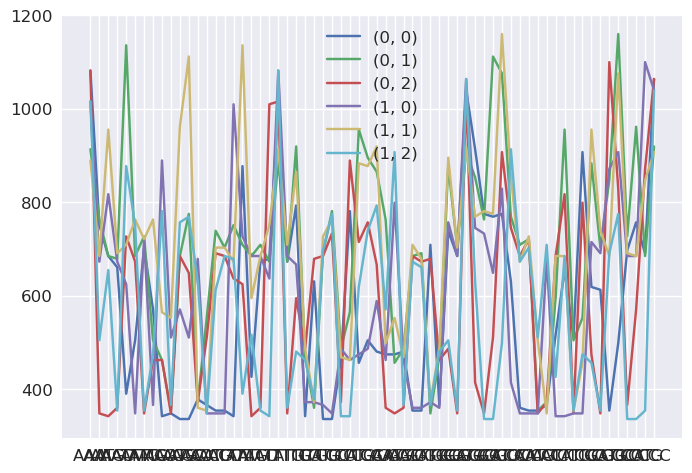

In [3]:
fig, ax = plt.subplots()

for init_state in get_tb_basis((2, num_bases)):
    lifetime_dict = my_load(f'lifetime_{init_state}_version_0', directory='stored_data\\stored_results\\ELM_3bp')
    ax.plot(lifetime_dict.keys(), lifetime_dict.values(), label = init_state)
ax.legend()

# Relaxation rates

In [ ]:
# non-uniform relaxation

kwargs = dict(uniform_relaxation = False, relax_rates = {'C': 1e3/820, 'G': 1e3/360, 'T': 1e3/490, 'A': 1e3/750})
# Barbatti2010, 10.1073/pnas.1014982107
# 'A': 330, 'T': 740 # Crespo-Hernandez2004,10.1038/nature03933 

# Nearest-neighbor cutoff

Data loaded from stored_data\tb_params\Hawke2010_electron_ELM.json
Data loaded from stored_data\tb_params\Hawke2010_hole_ELM.json


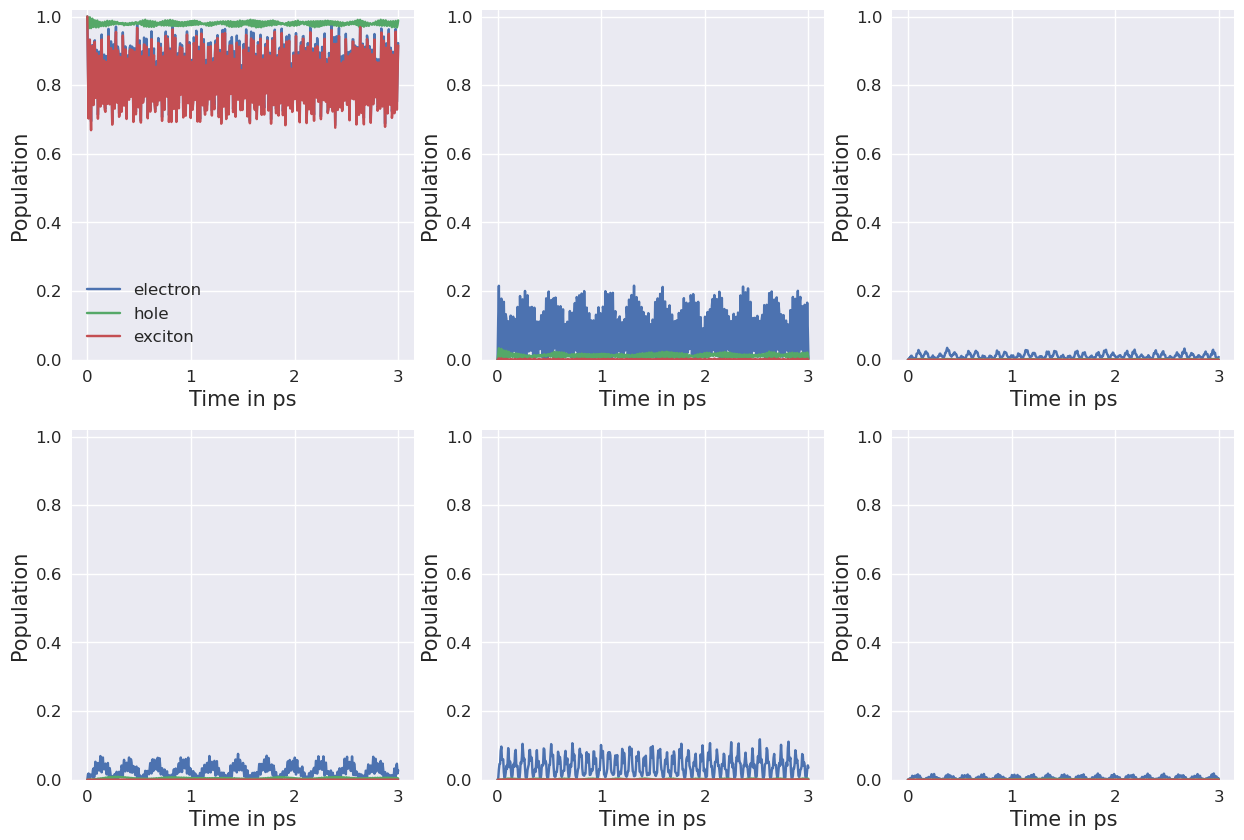

In [10]:
# interaction without nearest neighbor cutoff

kwargs = dict(nn_cutoff=False, interaction_param = 100)
me_solver = get_me_solver('GCG', 'ELM', **kwargs)
plot_pops(me_solver)

Data loaded from stored_data\tb_params\Hawke2010_electron_ELM.json
Data loaded from stored_data\tb_params\Hawke2010_hole_ELM.json


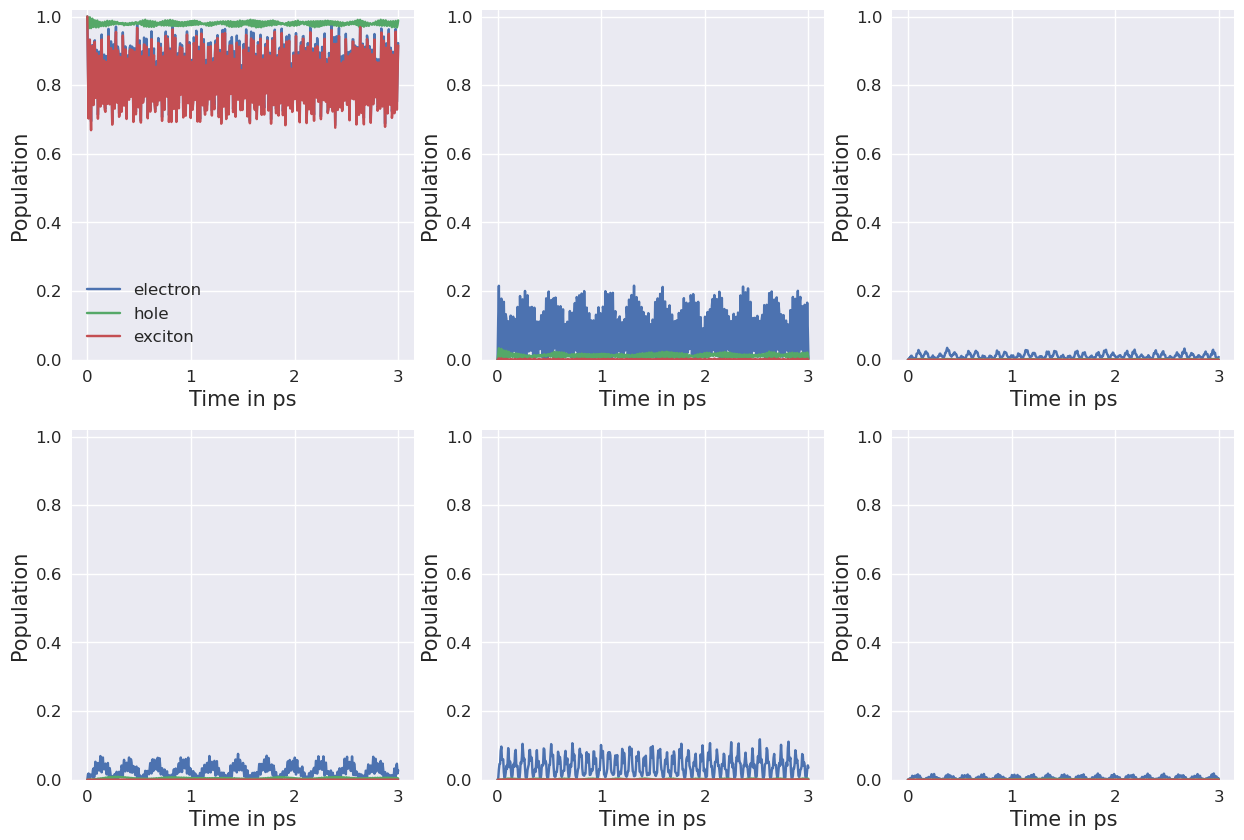

In [11]:
# interaction without nearest neighbor cutoff

kwargs = dict(nn_cutoff=True, interaction_param = 100)
me_solver = get_me_solver('GCG', 'ELM', **kwargs)
plot_pops(me_solver)

Data loaded from stored_data\tb_params\Hawke2010_electron_ELM.json
Data loaded from stored_data\tb_params\Hawke2010_hole_ELM.json


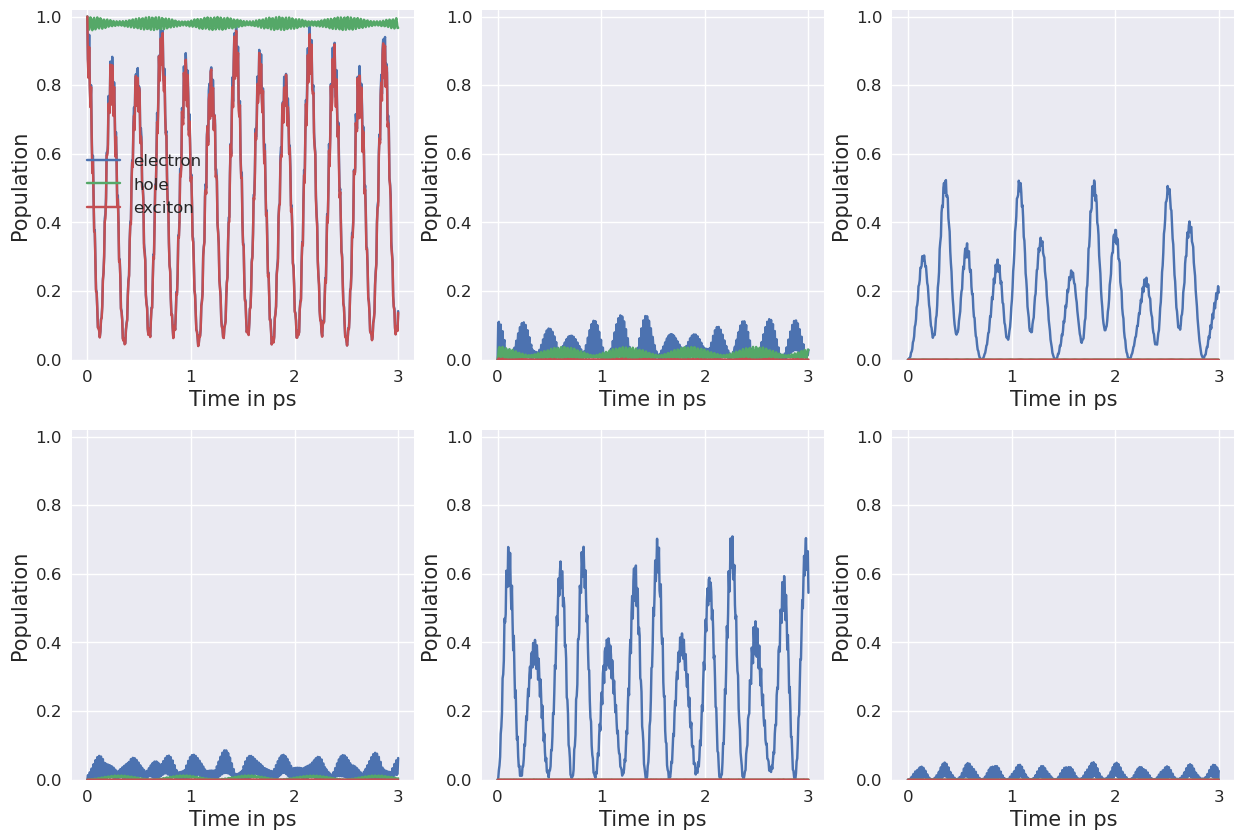

In [5]:
# interaction without nearest neighbor cutoff

kwargs = dict(nn_cutoff=False, interaction_param = 0)
me_solver = get_me_solver('GCG', 'ELM', **kwargs)
plot_pops(me_solver)